<a href="https://colab.research.google.com/github/WafaBakir/edge_detection/blob/main/css.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

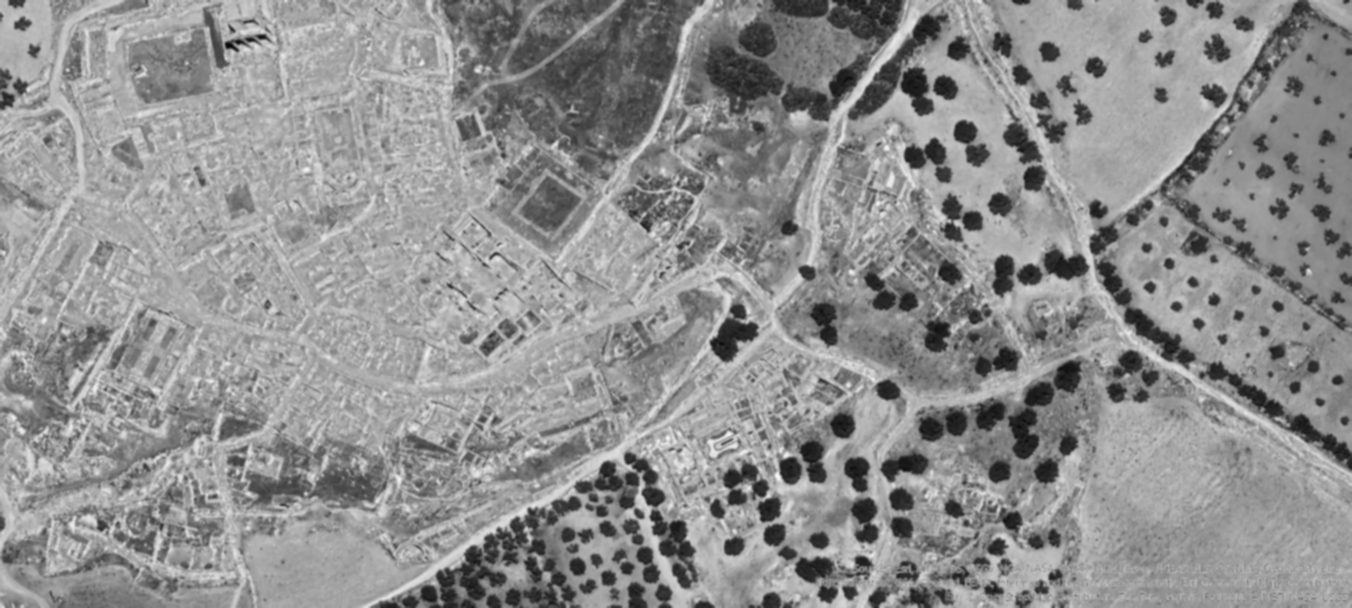

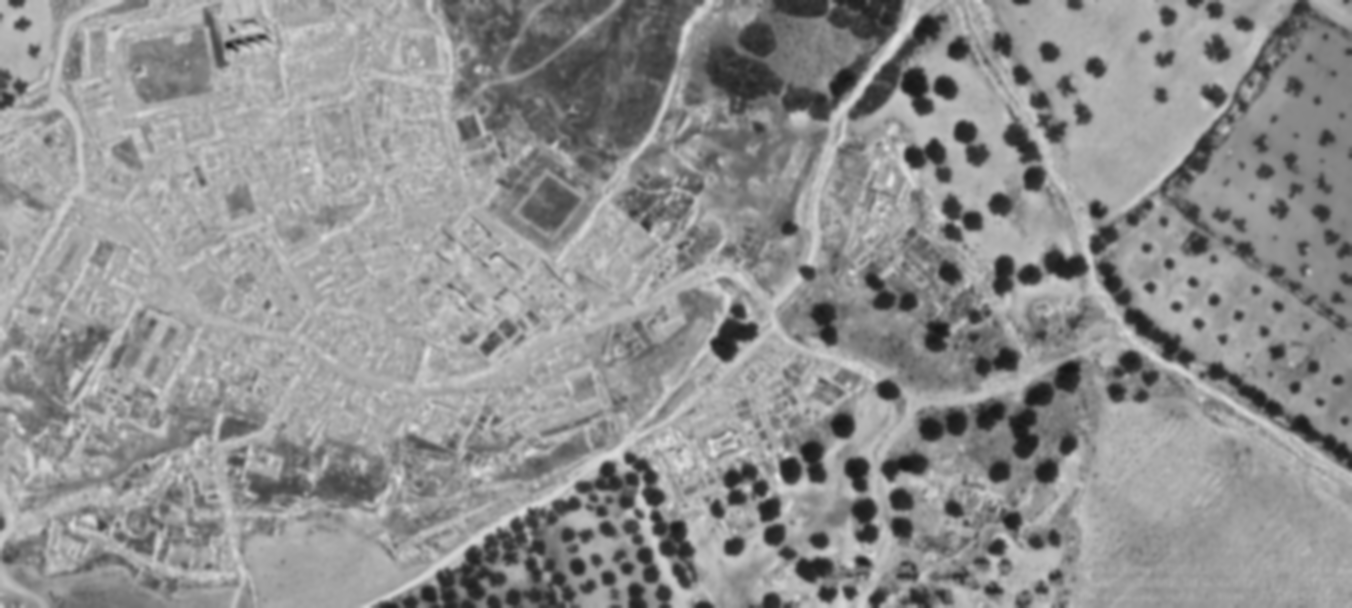

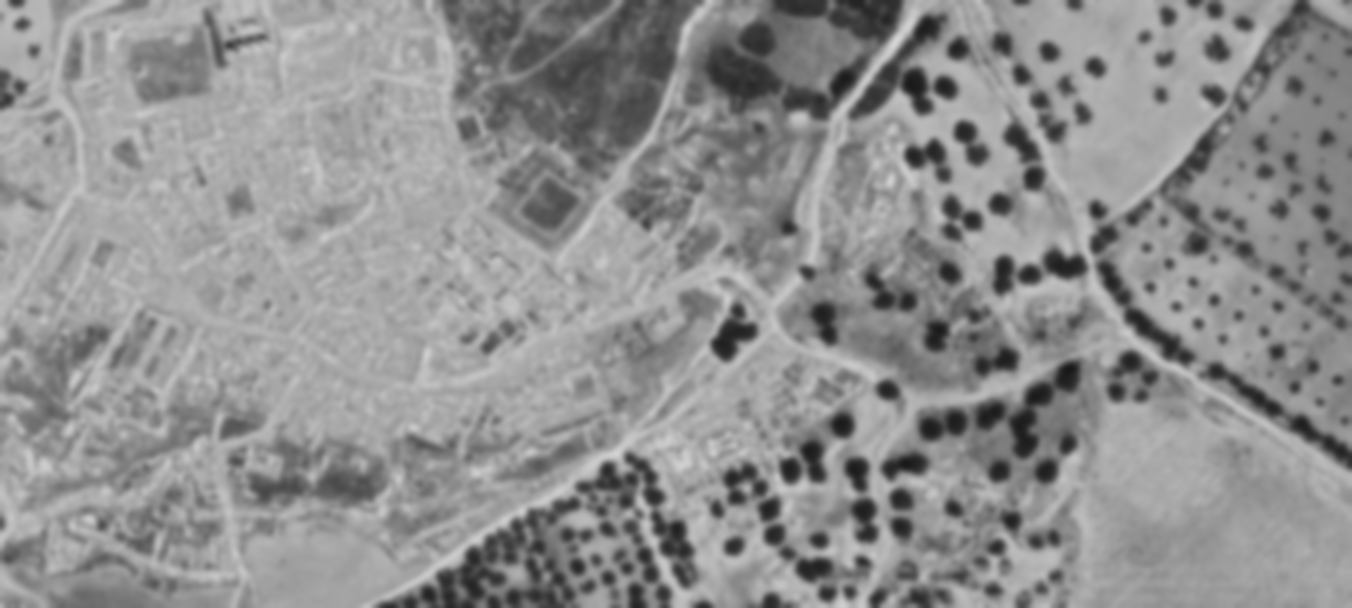

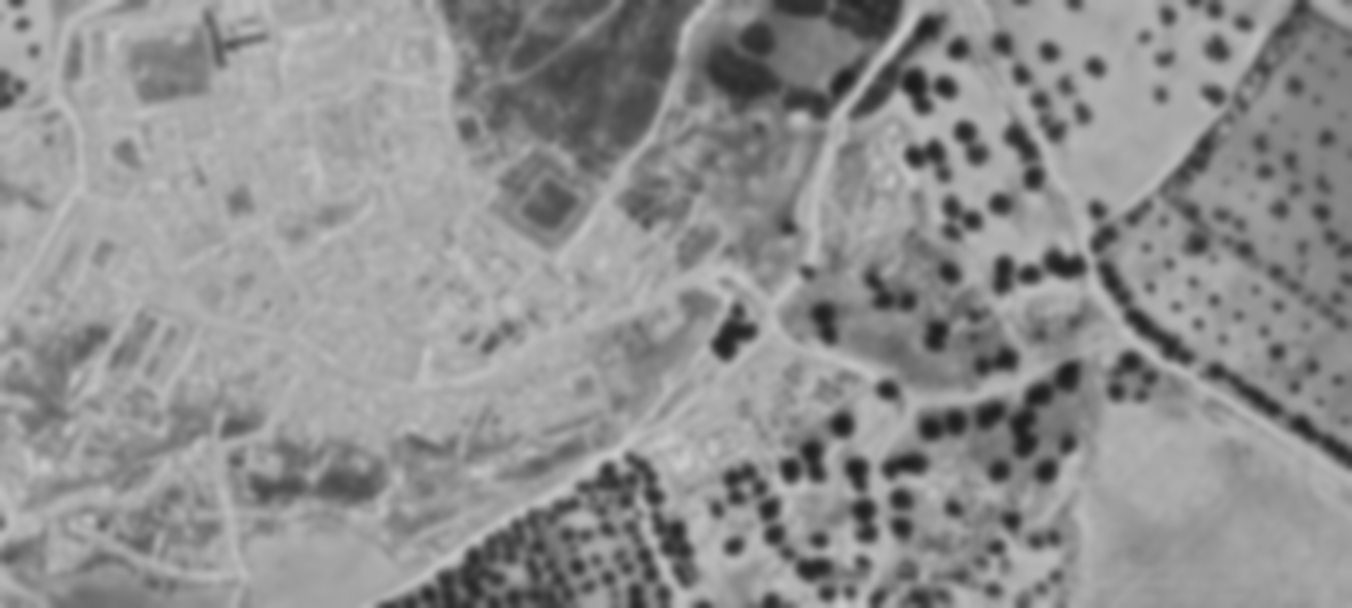

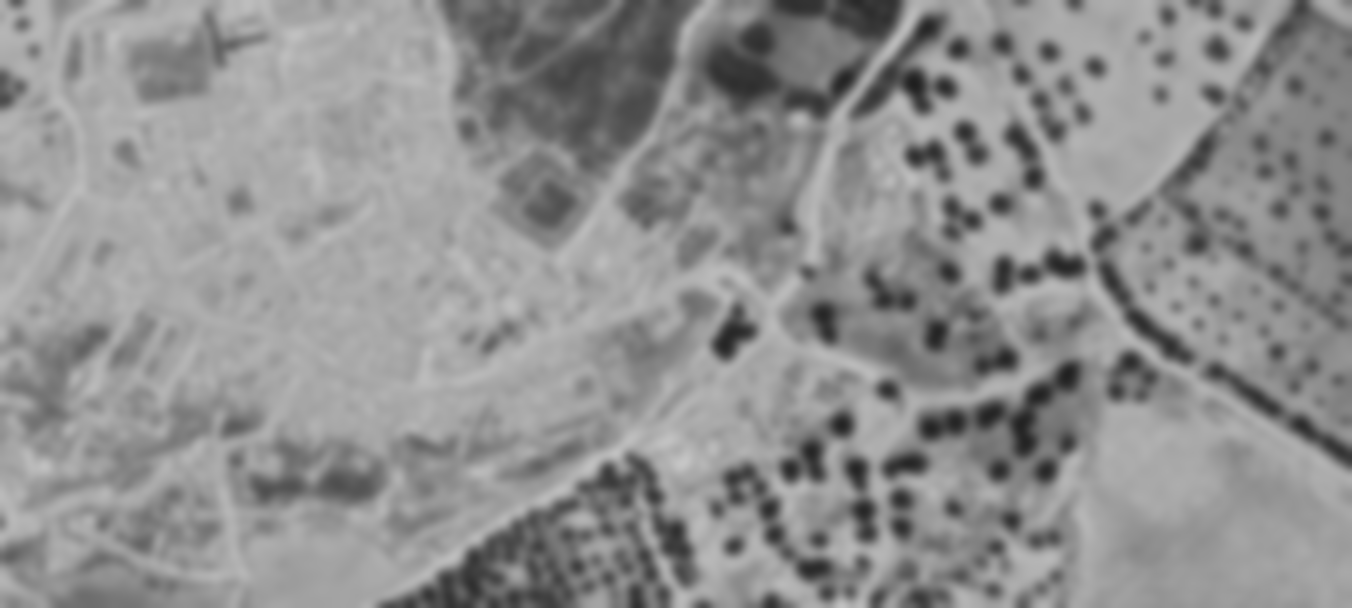

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def scale_space_construction(image, num_scales, min_sigma, max_sigma):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize an empty list to store the scale space images
    scale_space_images = []

    # Generate smoothed images at different scales
    for sigma in np.linspace(min_sigma, max_sigma, num_scales):
        # Apply Gaussian smoothing to the grayscale image
        smoothed = cv2.GaussianBlur(gray, (0, 0), sigmaX=sigma, sigmaY=sigma)
        # Store the smoothed image
        scale_space_images.append(smoothed)

    return scale_space_images

# Read the input image
image = cv2.imread('/content/Arch of Septimus Severus.jpg')

# Define parameters for scale space construction
num_scales = 5  # Number of scales
min_sigma = 1.0  # Minimum standard deviation for Gaussian kernel
max_sigma = 5.0  # Maximum standard deviation for Gaussian kernel

# Construct scale space
scale_space_images = scale_space_construction(image, num_scales, min_sigma, max_sigma)

# Display the scale space images
for i, scale_space_image in enumerate(scale_space_images):
    cv2_imshow(scale_space_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

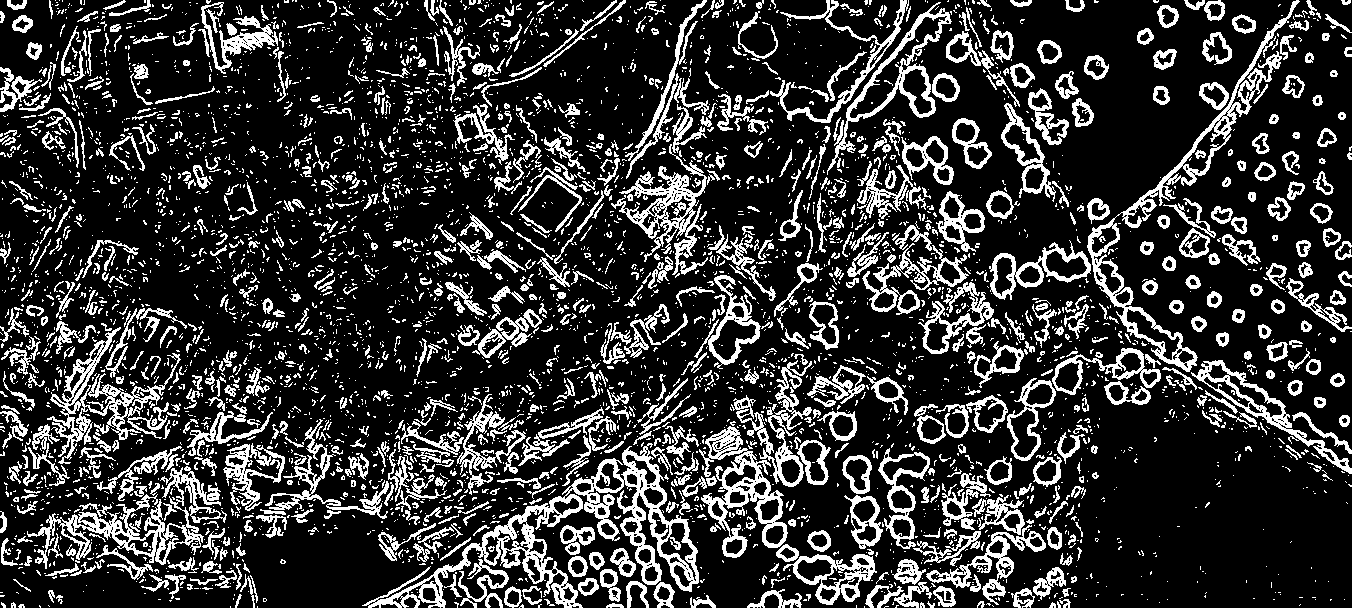

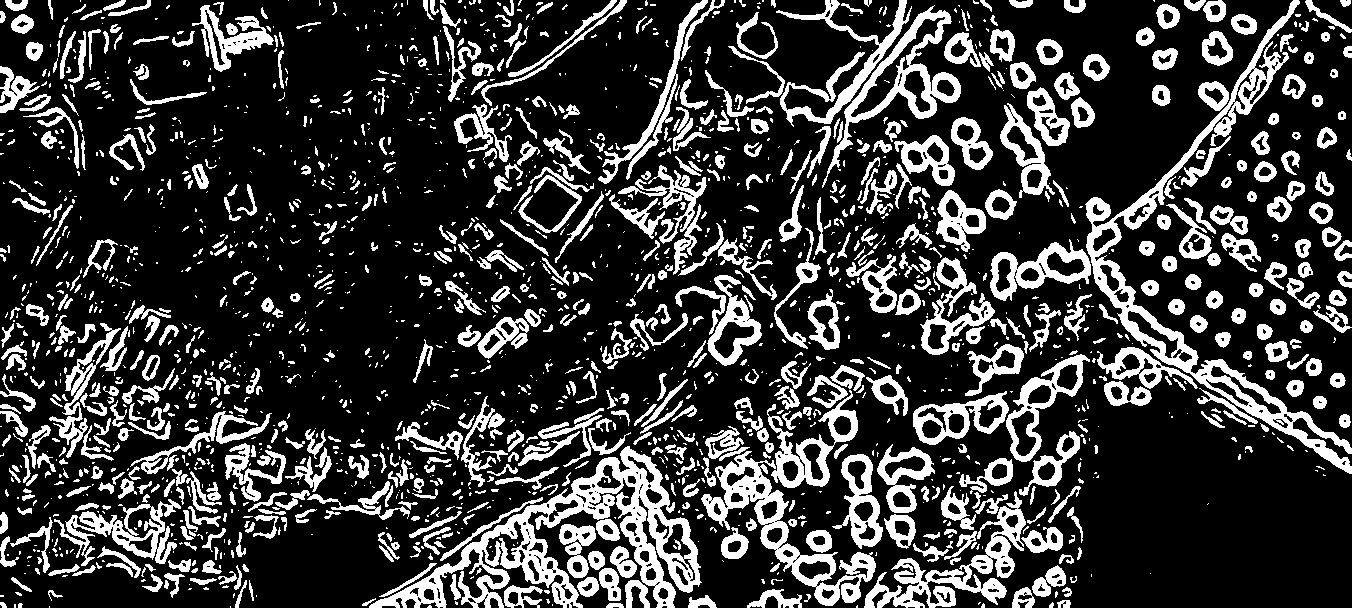

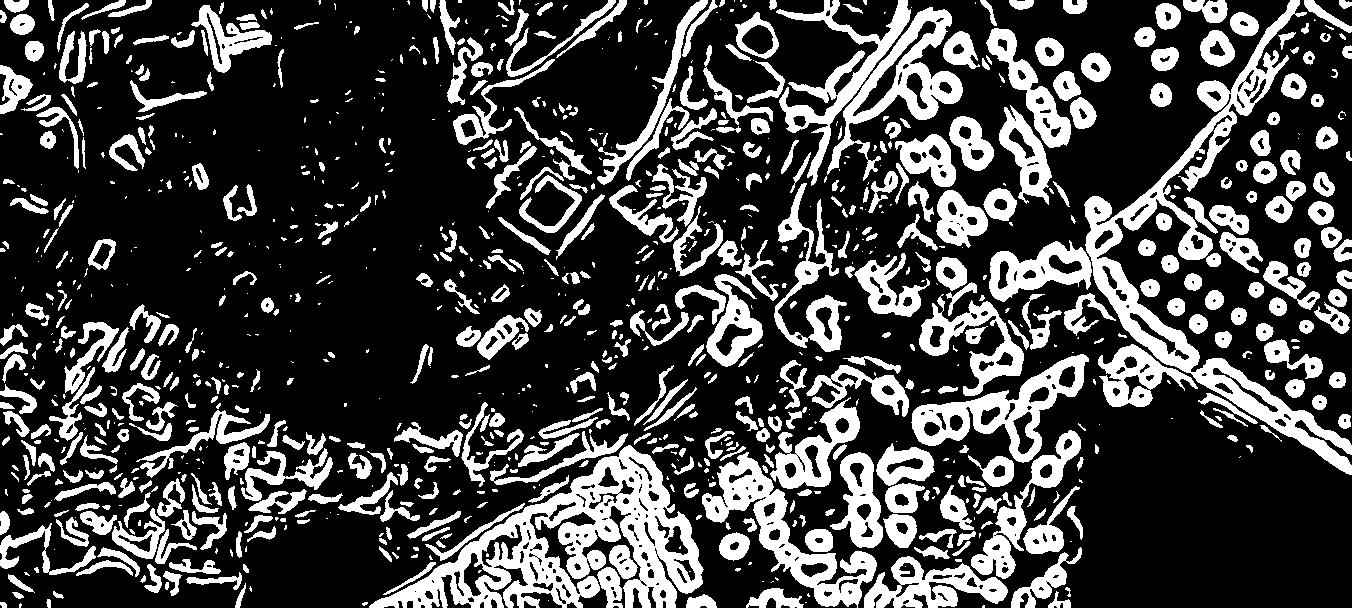

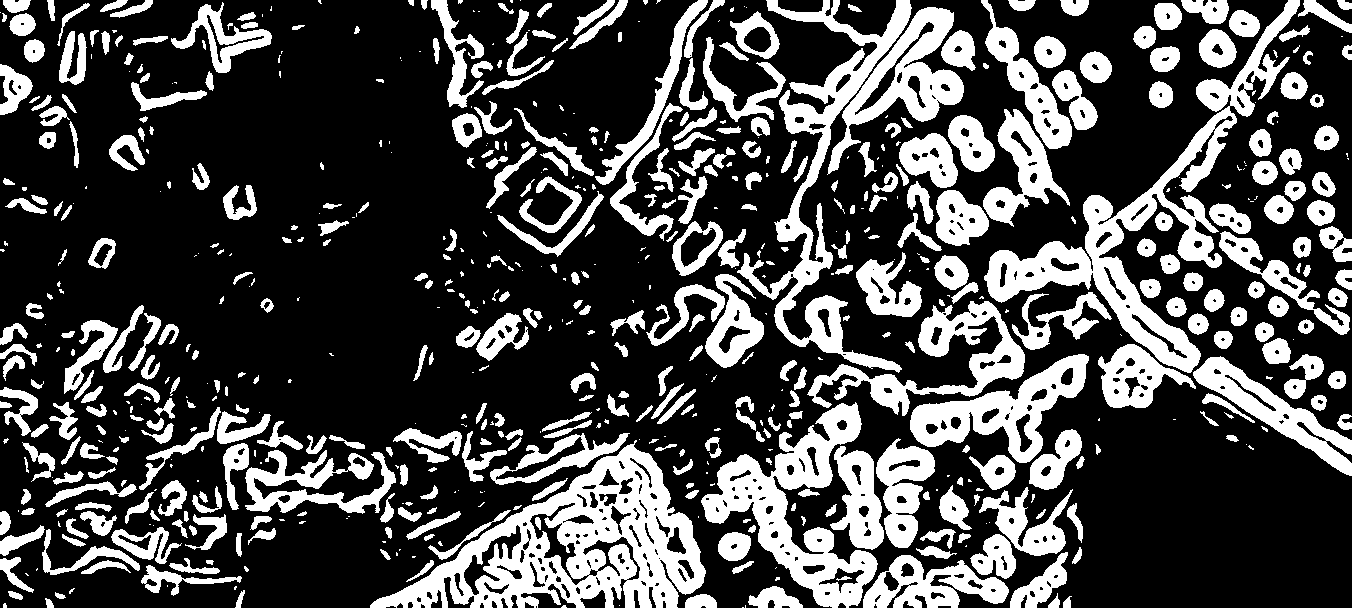

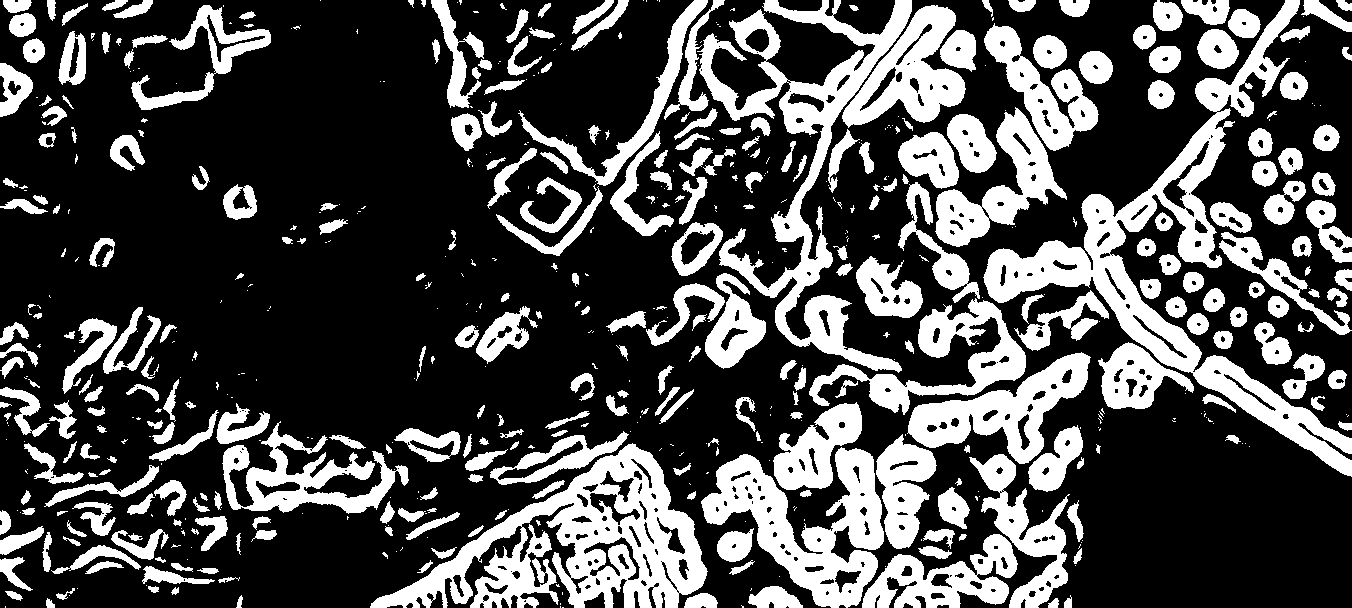

In [ ]:


def edge_detection_sobel(scale_space_images):
    # Initialize an empty list to store the edge images
    edge_images = []

    # Compute edges using Sobel operator for each scale space image
    for image in scale_space_images:
        # Compute gradients using Sobel operator
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        # Compute magnitude of gradient
        magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        # Normalize magnitude to range [0, 255]
        magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Convert magnitude to uint8
        magnitude = np.uint8(magnitude)
        # Thresholding to obtain binary edge image
        _, edge = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)
        # Store the edge image
        edge_images.append(edge)

    return edge_images


# Perform edge detection using Sobel operator
edge_images = edge_detection_sobel(scale_space_images)

# Display the edge images
for i, edge_image in enumerate(edge_images):
    cv2_imshow(edge_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

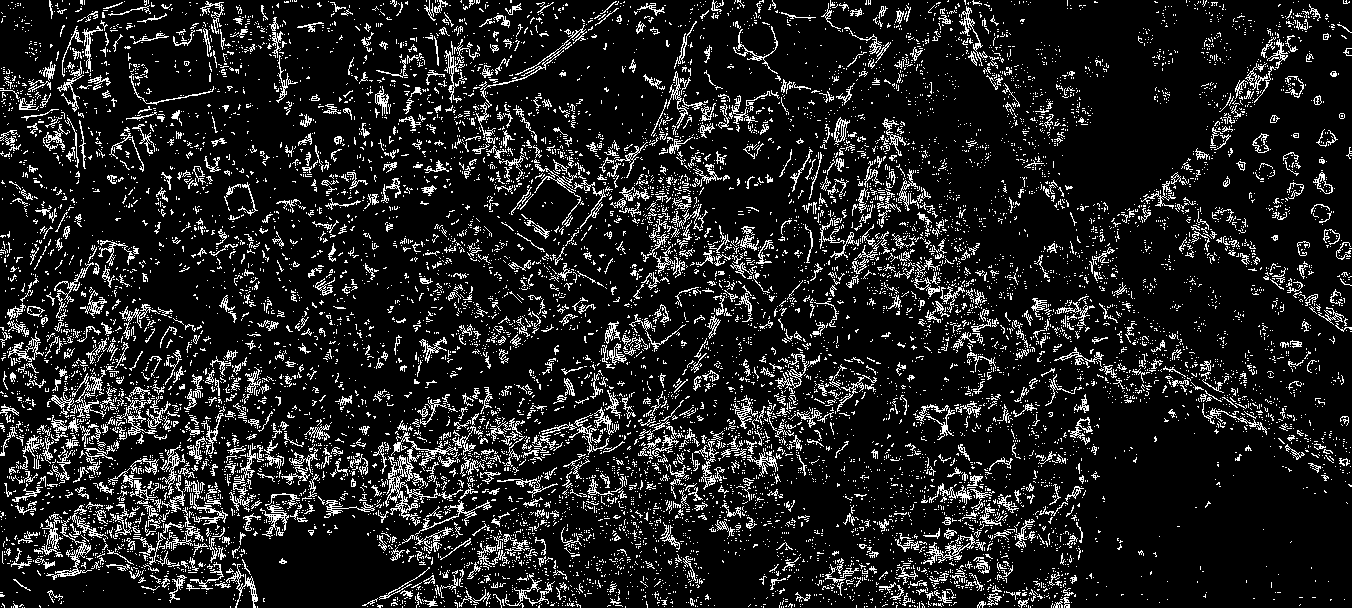

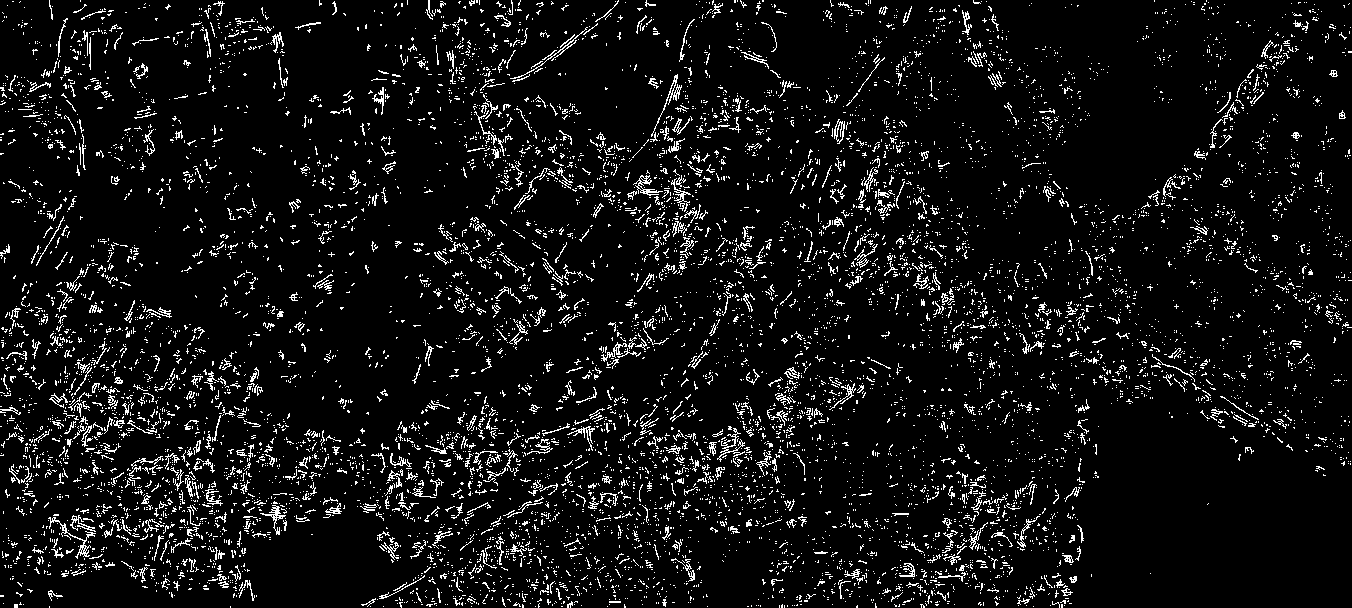

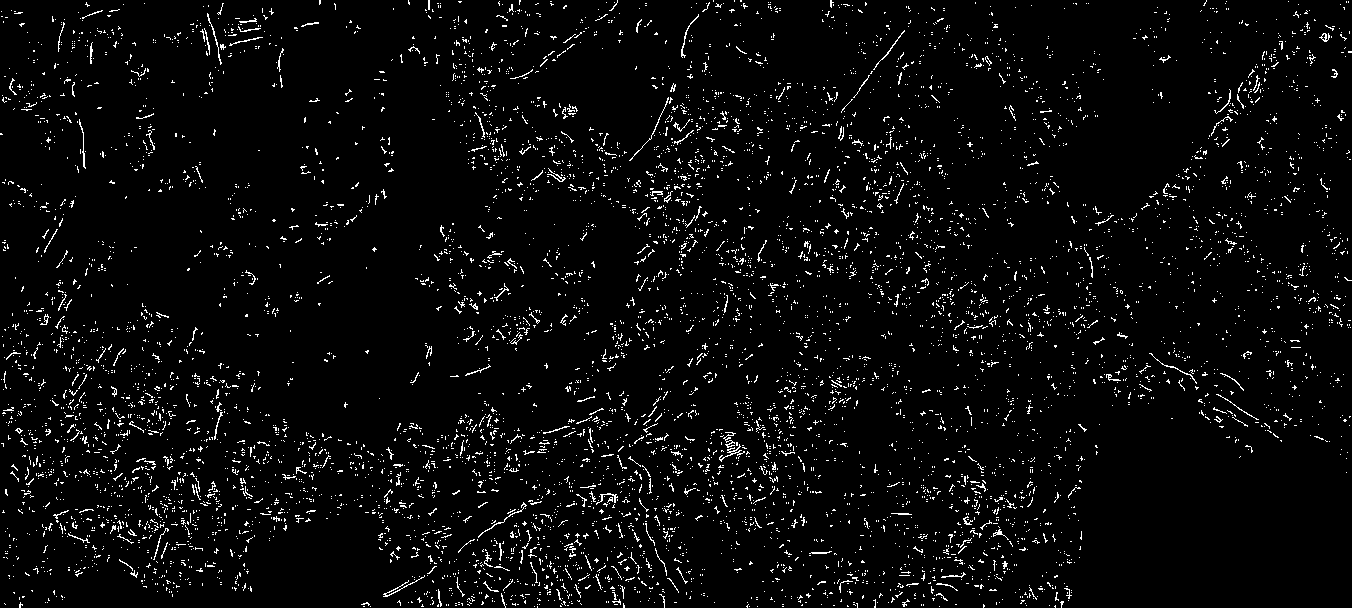

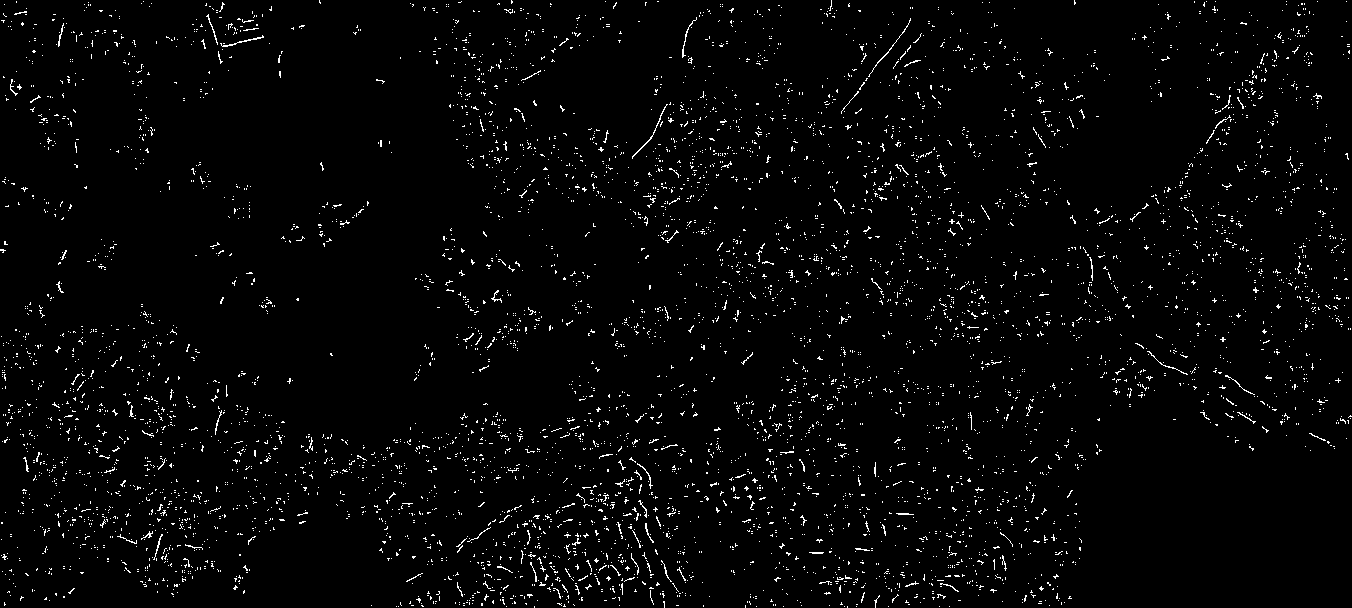

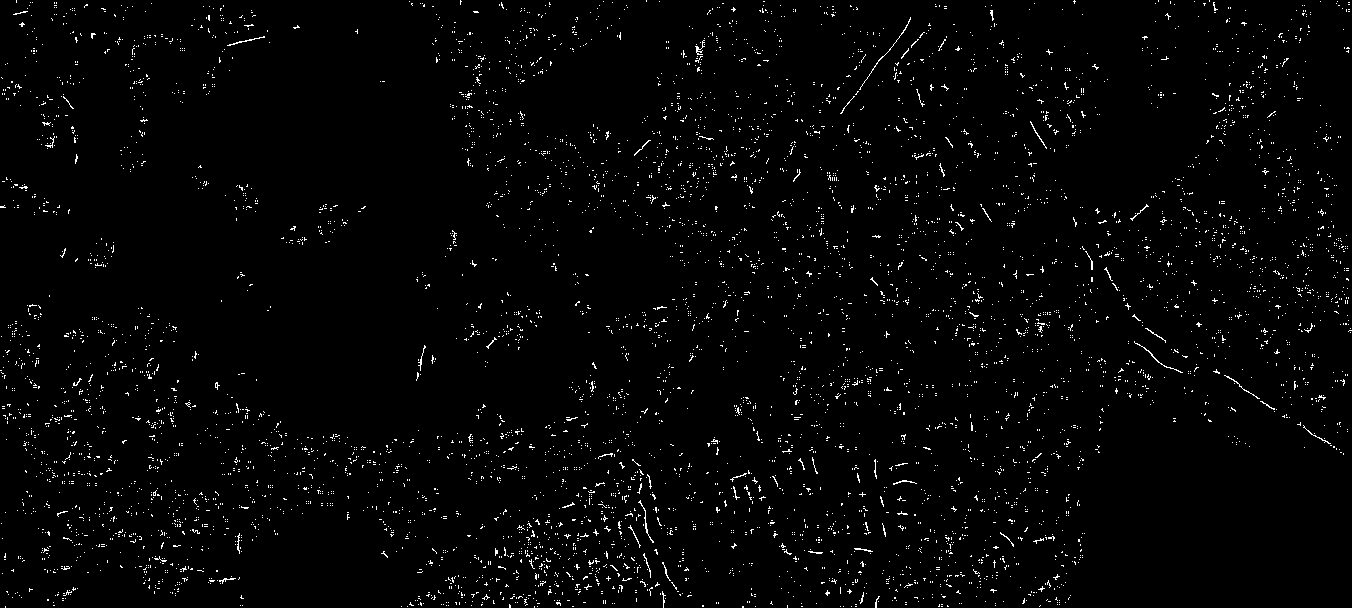

In [ ]:


def curvature_analysis(edge_images):
    # Initialize an empty list to store the curvature images
    curvature_images = []

    # Compute curvature for each edge image
    for edge_image in edge_images:
        # Compute gradients using Sobel operator
        sobel_x = cv2.Sobel(edge_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(edge_image, cv2.CV_64F, 0, 1, ksize=3)

        # Compute magnitude of gradient
        magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Compute second derivatives along x and y directions
        sobel_xx = cv2.Sobel(sobel_x, cv2.CV_64F, 1, 0, ksize=3)
        sobel_yy = cv2.Sobel(sobel_y, cv2.CV_64F, 0, 1, ksize=3)

        # Compute curvature as the sum of second derivatives
        curvature = np.abs(sobel_xx) + np.abs(sobel_yy)

        # Normalize curvature to range [0, 255]
        curvature = cv2.normalize(curvature, None, 0, 255, cv2.NORM_MINMAX)
        # Convert curvature to uint8
        curvature = np.uint8(curvature)

        # Thresholding to obtain binary curvature image
        _, curvature_binary = cv2.threshold(curvature, 100, 255, cv2.THRESH_BINARY)
        # Store the curvature image
        curvature_images.append(curvature_binary)

    return curvature_images


# Perform curvature analysis
curvature_images = curvature_analysis(edge_images)

# Display the curvature images
for i, curvature_image in enumerate(curvature_images):
    cv2_imshow(curvature_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

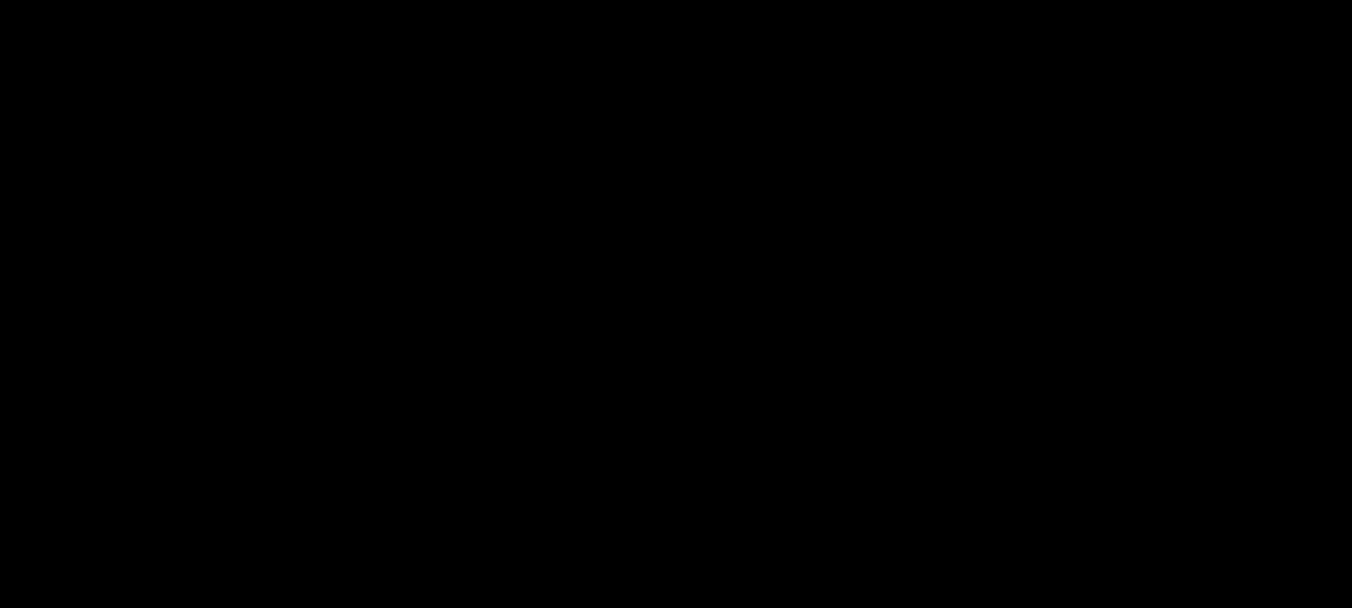

In [ ]:

def local_maxima_detection(curvature_images):
    # Initialize an empty list to store the detected points
    detected_points = []

    # Define a neighborhood size for local maxima detection
    neighborhood_size = 3

    # Iterate through each curvature image
    for curvature_image in curvature_images:
        # Pad the image to handle border cases
        padded_image = cv2.copyMakeBorder(curvature_image, neighborhood_size, neighborhood_size, neighborhood_size, neighborhood_size, cv2.BORDER_CONSTANT, value=0)

        # Iterate through each pixel in the image (excluding borders)
        for y in range(neighborhood_size, curvature_image.shape[0] + neighborhood_size):
            for x in range(neighborhood_size, curvature_image.shape[1] + neighborhood_size):
                # Extract the local neighborhood around the current pixel
                neighborhood = padded_image[y - neighborhood_size:y + neighborhood_size + 1, x - neighborhood_size:x + neighborhood_size + 1]

                # Check if the current pixel is a local maximum within its neighborhood
                if np.max(neighborhood) == curvature_image[y - neighborhood_size, x - neighborhood_size]:
                    # Store the coordinates of the detected point
                    detected_points.append((x - neighborhood_size, y - neighborhood_size))

    return detected_points


# Perform local maxima detection
detected_points = local_maxima_detection(curvature_images)

# Display the detected points
for point in detected_points:
    cv2.circle(curvature_image, point, 3, (0, 255, 0), -1)  # Mark detected points on the curvature image

cv2_imshow(curvature_image)
cv2.waitKey(0)
cv2.destroyAllWindows()